In [1]:
%matplotlib inline
from PIL import Image
import requests
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from PIL import Image
import requests

im_pil = Image.open(requests.get("https://drivendata-public-assets.s3.amazonaws.com/memes-overview.png", stream=True).raw)
im = np.array(im_pil.convert("L"))
im_c = np.array(im_pil)


(([], []), ([], []))

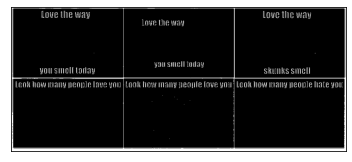

In [3]:
ret,thresh1 = cv.threshold(im,254,255,cv.THRESH_BINARY)

plt.imshow(thresh1,'gray',vmin=0,vmax=255)
plt.xticks([]),plt.yticks([])

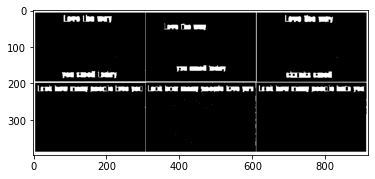

In [4]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(5, 5))

closing = cv.morphologyEx(thresh1, cv.MORPH_CLOSE, kernel)
# closing = cv.morphologyEx(thresh1, cv.MORPH_OPEN, kernel)

plt.imshow(closing,'gray',vmin=0,vmax=255)


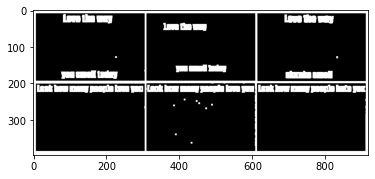

In [5]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(5, 5))
dilation = cv.dilate(closing, kernel)

plt.imshow(dilation,'gray',vmin=0,vmax=255)

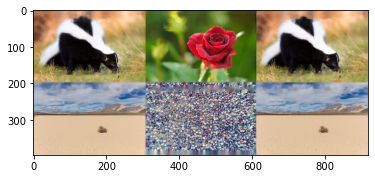

In [6]:
dst	= cv.inpaint(im_c, dilation, 15, cv.INPAINT_NS)

plt.imshow(dst,vmin=0,vmax=255)

(([], []), ([], []))

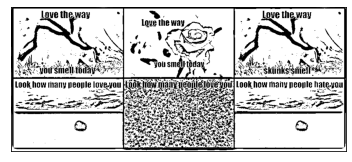

In [7]:
thresh2 = cv.adaptiveThreshold(im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 31, -10)

plt.imshow(thresh2,'gray',vmin=0,vmax=255)
plt.xticks([]),plt.yticks([])